<h1>
Week 2
</h1>
<h2>
Task 4: Metropolis Algorithm
</h2>
<h3>
The goal in this notebook is to see a new method of sampling a probability distribution by walking through a chain of points. Specifically we will discuss the Metropolis algorithm
</h3>

In [1]:
# Some useful imports
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt 
plt.rcParams['text.usetex'] = True

<p style="font-size:20px">
In this notebook we will be solving a problem from statistical mechanics, and introducing a sampling strategy known as the Metropolis algorithm.
<br><br>
We are investigating a particle moving in a 1D potential $V(x)$ connected to a heat bath at temperature $T$. If not for the heat bath the particle would simply sit at the minimum of potential (minimum kinetic and potential energy). A non-zero temperature however allows for fluctuations up the walls of the potential. The probability of finding the particle at a position $x$ is given by the Boltzmann factor,
    $$
    p(x)\propto\exp\bigg(\frac{-V(x)}{K_B T}\bigg) \equiv \exp(-\beta V(x))
    $$
</p>

<p style="color:Blue;font-size:20px;">
$\cdot$ Using the potential $V(x)=x^2/2$ produce a figure showing both the potential and Boltzmann factor in the same figure. We want to be able to make plots with various potential functions, so the name of the potential function is one of the inputs to the boltzmann function.
<br><br>
$\cdot$ Show the plot for various values of $\beta$. What do you expect to happen to the physical system at low temperature (high $\beta$) and high temperature (low $\beta$)
</p>

In [2]:
def potential(x):
    #YOUR CODE HERE

def boltzmann(x, beta, pot_func):
    #YOUR CODE HERE

<hr style="height:1px;width:75%">

<p style="font-size:20px">
It isn't always possible to simply choose random numbers to sample the probability distribution $p(x)$.
<br><br>
In this example we will use the Metropolis algortithm -- a method for choosing a new value of $x$ based on the current position. This creates a <a href="https://en.wikipedia.org/wiki/Markov_chain">chain</a> of $x$ values that samples the probability distribution.
</p>

<p style="font-size:20px">
Metropolis algrothim:
<br><br>
1) Start by picking a random point $x_0$ from a <i>sensible</i> range.
<br>
2) Record your position in your data structure of choice.
<br>
3) Propose a step by choosing a $\delta x$, again from a <i>sensible</i> distribution.
<br>
4) Evaluate the ratio of probabilities $\alpha=P(x+\delta x)/P(x)$. If this ratio is favourable ($\alpha\geq 1$) then take the step. If it is not ($\alpha<1$) then take the step with probability $\alpha$.
<br>
5) Go back to step 2 till enough samples have been taken.
<br><br>
We have implemented this algorithm for you. Make sure you can follow what the code is doing.
</p>

In [3]:
# This function will provide a series of x values using the metropolis and a provided probability function
def get_sample(prob_func, size):
    max_step=0.5
    x_0 = rand.uniform(-max_step, max_step)
    positions = np.array([x_0,])
    
    for _ in range(size):
        step = rand.uniform(-max_step, max_step)
        alpha = prob_func(positions[-1]+step)/prob_func(positions[-1])

        if alpha >= 1:
            positions = np.append(positions, positions[-1]+step)
        else:
            take_step = rand.choice([True, False], p=[alpha, 1-alpha])
            if (take_step):
                positions = np.append(positions, positions[-1]+step)
            else:
                positions = np.append(positions, positions[-1])
    
    return positions

<p style="color:Blue;font-size:20px;">
$\cdot$ Use the function provided above with your probability function to achieve a sample of x values. Visualise this using the code snippets below.
</p>
<p style="color:Black;font-size:20px;">
Remember that the results are random - it is worth running the cell a few times to get a feel for what it is doing.
</p>

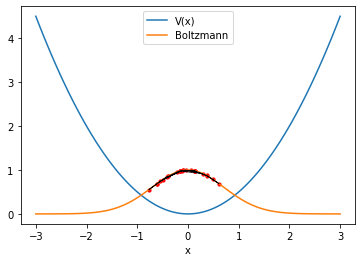

<Figure size 432x288 with 0 Axes>

In [5]:
# This code snippet will visualise the trajectory through the potential.
# Plug in your function and give it a go
x_arr = np.linspace(-3, 3, 100)
beta = 2.0

fig, ax = plt.subplots()

trajectory = get_sample(YOUR_PROBABILITY, 25)

ax.set(xlabel="x")

ax.plot(x_arr, YOUR_POTENTIAL(x_arr), label="V(x)")
ax.plot(x_arr, YOUR_PROBABILITY(x_arr), label="Boltzmann")

ax.plot(trajectory, YOUR_PROBABILITY(trajectory), linewidth=0.75, color="black")
ax.scatter(trajectory, YOUR_PROBABILITY(trajectory), color="red", s=10)

ax.legend()

plt.show()
plt.clf()

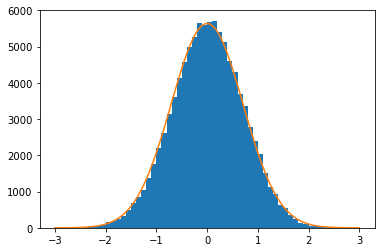

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots()

sample = get_sample(YOUR_PROBABILITY, 100_000)

ax.hist(sample, bins=60, range=(-3,3))
ax.plot(x_arr, len(sample)*YOUR_PROBABILITY(x_arr)/np.sqrt(2*np.pi/beta)/10)

plt.show()
plt.clf()

<hr style="height:1px;width:75%">

<p style="color:Blue;font-size:20px;">
$\cdot$ Use these trajectories to give expectation values $\langle x\rangle$ and $\langle V\rangle$. You could also calculate $\langle x^2\rangle$ and $\langle V^2\rangle$ and use these to calculate the uncertainties on $\langle x\rangle$ and $\langle V\rangle$. Give these for a range of $\beta$ values and discuss the results.
<br>
For our simple quadratic potential, it is possible to calculate both $\langle x\rangle$ and $\langle V\rangle$ analytically, but you might be able to anticipate their values (hints: 1. the potential is symmetric, 2. the equipartition theorem applies).
<br><br>
$\cdot$ Modify the potential to $V(x)=x^2/2 + \exp(-8x^2)$. Plot $V(x)$ and $p(x)$. Discuss what changes you expect in the results and test your intuition with MC integration.
</p>